# Librerías

In [34]:
import cv2
import matplotlib.pyplot as plt
import time

import torch
from ultralytics import YOLO

# Clase YOLO Personalizada

In [35]:
class CustomYOLO:
    def __init__(self, device=None, conf=0.25):

        if (device == 'cpu'):
            self.device = device # Forzamos la ejecución de CPU
        else:
            self.device = 'cuda' if torch.cuda.is_available() else 'cpu'

        self._image = None
        self._results = None

        self.conf = conf
        self.model = None

        self.__loadModel()


    def __loadModel(self):
        self.model = YOLO('yolov8n.pt').to(self.device)

    def __loadImage(self, imagePath: str):
        self._image = cv2.imread(imagePath)
        if self._image is None:
            print(f"Error: No se pudo cargar la imagen en {imagePath}")

    def predict(self, imagePath):
        self.__loadImage(imagePath)
        if self._image is None:
            print(f"Error: No se pudo cargar la imagen {imagePath}.")
            return
        
        self._results = self.model.predict(source=self._image, conf=self.conf, device=self.device)

    def visualizate(self, figsize=(12, 8), savePath=None):
        if self._results is None:
            print("Error: No se ha realizado ninguna predicción.")
            return
        
        person_boxes = [b for b in self._results[0].boxes if int(b.cls) == 0]

        for box in person_boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cv2.rectangle(self._image, (x1, y1), (x2, y2), (0, 255, 0), 10)
        
        if savePath:
            cv2.imwrite(savePath, self._image)

        plt.figure(figsize=figsize)
        plt.imshow(cv2.cvtColor(self._image, cv2.COLOR_BGR2RGB))
        plt.title("Detección de personas")
        plt.axis("off")
        plt.show()

# Aplicación del modelo YOLOv8

-------------------------------------------
CPU Prediction

0: 448x640 18 persons, 3 cars, 5 traffic lights, 48.8ms
Speed: 2.5ms preprocess, 48.8ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)

-------------------------------------------
GPU Prediction

0: 448x640 18 persons, 3 cars, 5 traffic lights, 5.4ms
Speed: 1.6ms preprocess, 5.4ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


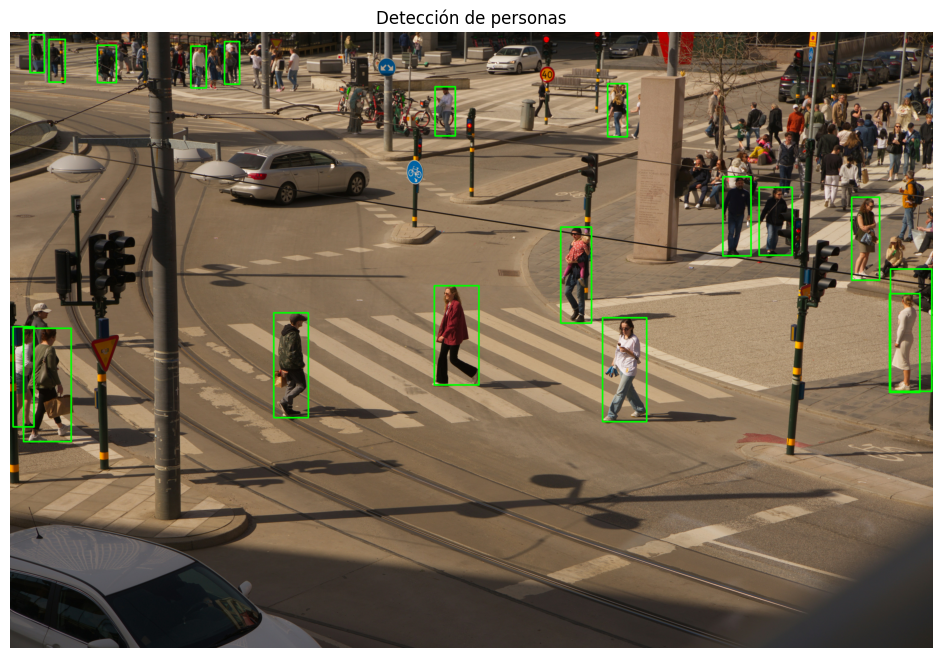

-------------------------------------------
CPU Prediction

0: 640x384 9 persons, 3 backpacks, 1 handbag, 52.1ms
Speed: 2.0ms preprocess, 52.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

-------------------------------------------
GPU Prediction

0: 640x384 9 persons, 3 backpacks, 1 handbag, 5.9ms
Speed: 1.6ms preprocess, 5.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


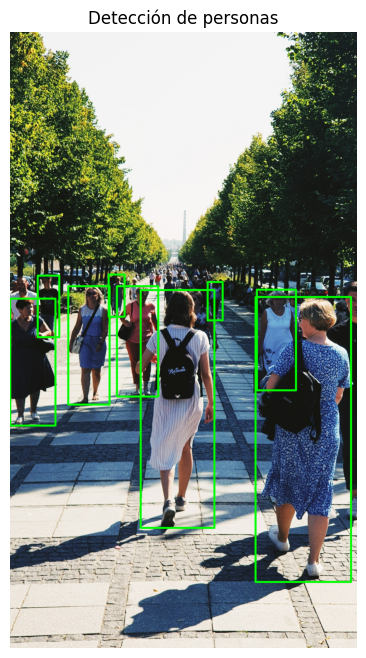

-------------------------------------------
CPU Prediction

0: 448x640 24 persons, 1 bicycle, 5 cars, 2 motorcycles, 1 stop sign, 57.8ms
Speed: 3.7ms preprocess, 57.8ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)

-------------------------------------------
GPU Prediction

0: 448x640 24 persons, 1 bicycle, 5 cars, 2 motorcycles, 1 stop sign, 6.7ms
Speed: 3.3ms preprocess, 6.7ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


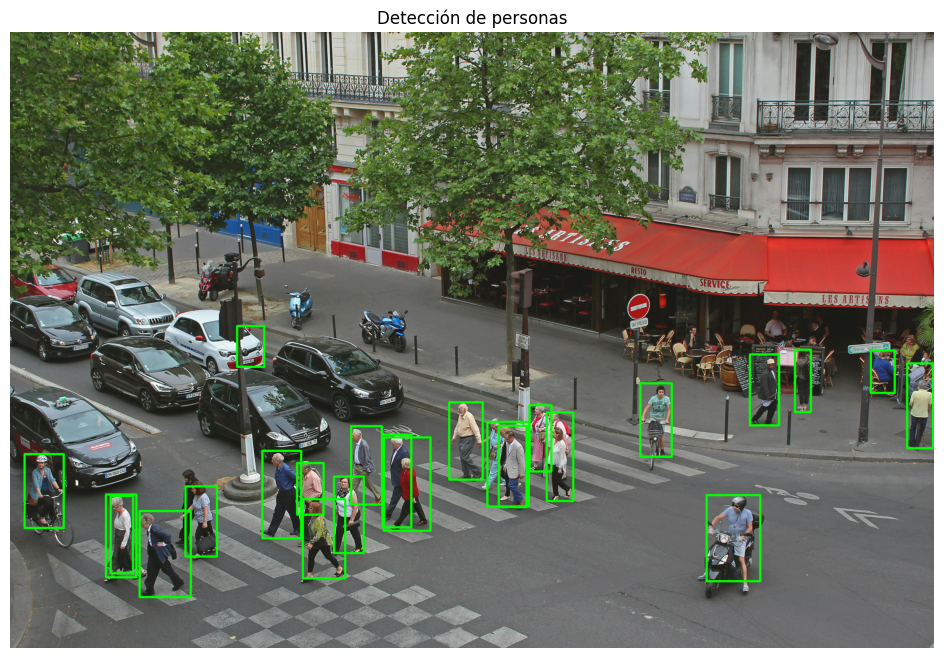

In [36]:
cpuYOLO = CustomYOLO(device="cpu")
gpuYOLO = CustomYOLO()

NUM_IMAGES = 3
imagePath = "images/"

for i in range(1, NUM_IMAGES + 1):

    print("-------------------------------------------\nCPU Prediction")
    cpuYOLO.predict(imagePath + f"image{i}.jpg")

    print("\n-------------------------------------------\nGPU Prediction")
    gpuYOLO.predict(imagePath + f"image{i}.jpg")

    gpuYOLO.visualizate(savePath= imagePath + f"image{i}_result.jpg")